# --- PART 0: ENVIRONMENT SETUP & LOGGING ---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
import logging

# 1. Professional Logging Setup
# This replaces all print statements throughout the notebook
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Setting global visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 2. Data Loading with Error Handling
try:
    # Loading the cleaned data from the 'data' folder
    df = pd.read_csv('../data/parkinsons_cleaned.csv', index_col='PatientID')
    logger.info(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    logger.error("Data file not found. Please check the path: '../data/parkinsons_cleaned.csv'")
except Exception as e:
    logger.error(f"An unexpected error occurred during data loading: {e}")

# Displaying first few rows (Head is allowed as it's for visual inspection in Notebook)
df.head()

2026-01-13 14:19:12,889 - INFO - Dataset loaded successfully. Shape: (2105, 33)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


# --- PART 1: GLOBAL CORRELATION LANDSCAPE ---

2026-01-13 14:20:08,961 - INFO - Starting Global Correlation Analysis...


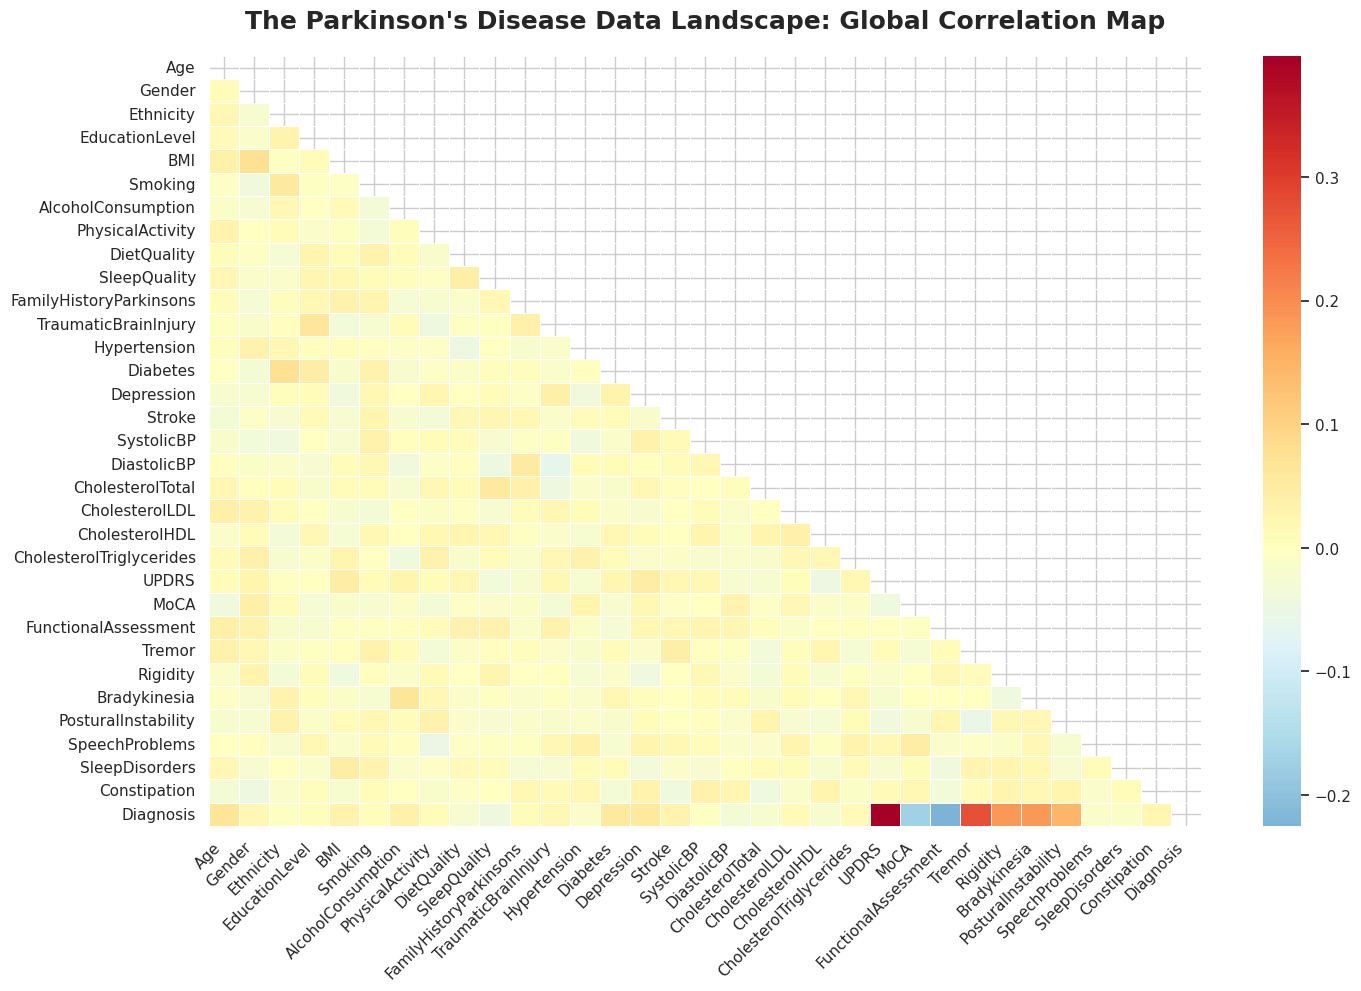

2026-01-13 14:20:09,882 - INFO - Heatmap visualization complete.


In [3]:
logger.info("Starting Global Correlation Analysis...")

# Calculate the Pearson Correlation Matrix
corr_matrix = df.corr()

# Visualization: Professional Heatmap
plt.figure(figsize=(16, 10))
# Masking the upper triangle to reduce visual noise (Instruction V: Structure and Readability)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='RdYlBu_r', center=0, linewidths=0.5, annot=False)
plt.title('The Parkinson\'s Disease Data Landscape: Global Correlation Map', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.show()

logger.info("Heatmap visualization complete.")

Part 2: The "Suspect Lineup" - Ranking Risk Factors

Objective: To visually rank the clinical features with the strongest link to a Parkinson's diagnosis, identifying the primary drivers of the disease in our dataset.

/tmp/ipykernel_446068/1443575414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')


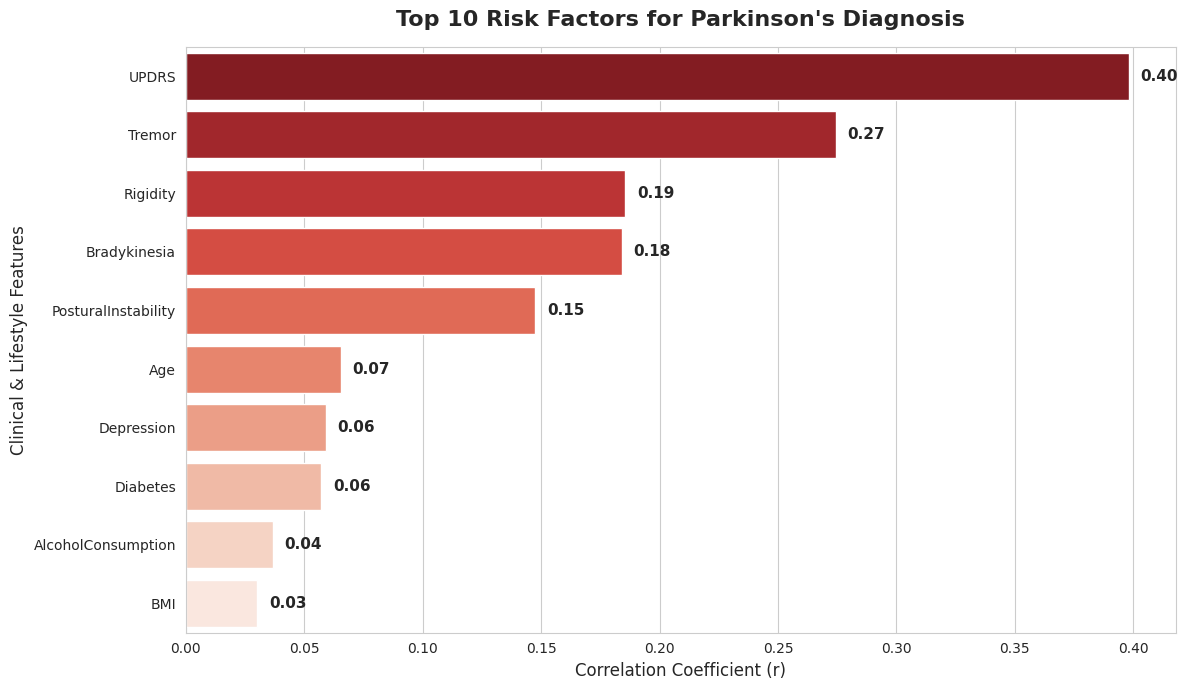

In [2]:
# 1. Focus on positive correlations with Diagnosis
# We filter for values > 0 and remove 'Diagnosis' to avoid a trivial 1.0 correlation
risk_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] > 0].drop('Diagnosis', errors='ignore')

# 2. Extract and sort the Top 10 strongest positive links
top_risk_factors = risk_factors.sort_values(ascending=False).head(10)

# 3. Visualization: Create a high-impact horizontal bar plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Using 'Reds_r' palette (Reverse Reds) so the strongest factor is the darkest
risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')

# 4. Professional labeling and formatting for the slides
plt.title('Top 10 Risk Factors for Parkinson\'s Diagnosis', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Clinical & Lifestyle Features', fontsize=12)

# 5. Annotation: Adding the exact value on each bar for precision
for i, val in enumerate(top_risk_factors.values):
    risk_plot.text(val + 0.005, i, f'{val:.2f}', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

Part 3: The "Guardians" - Identifying Protective Factors

Objective: To highlight lifestyle and clinical features that are negatively correlated with Parkinson's, suggesting a potential protective effect or a link to better health outcomes.

/tmp/ipykernel_446068/1529557583.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')


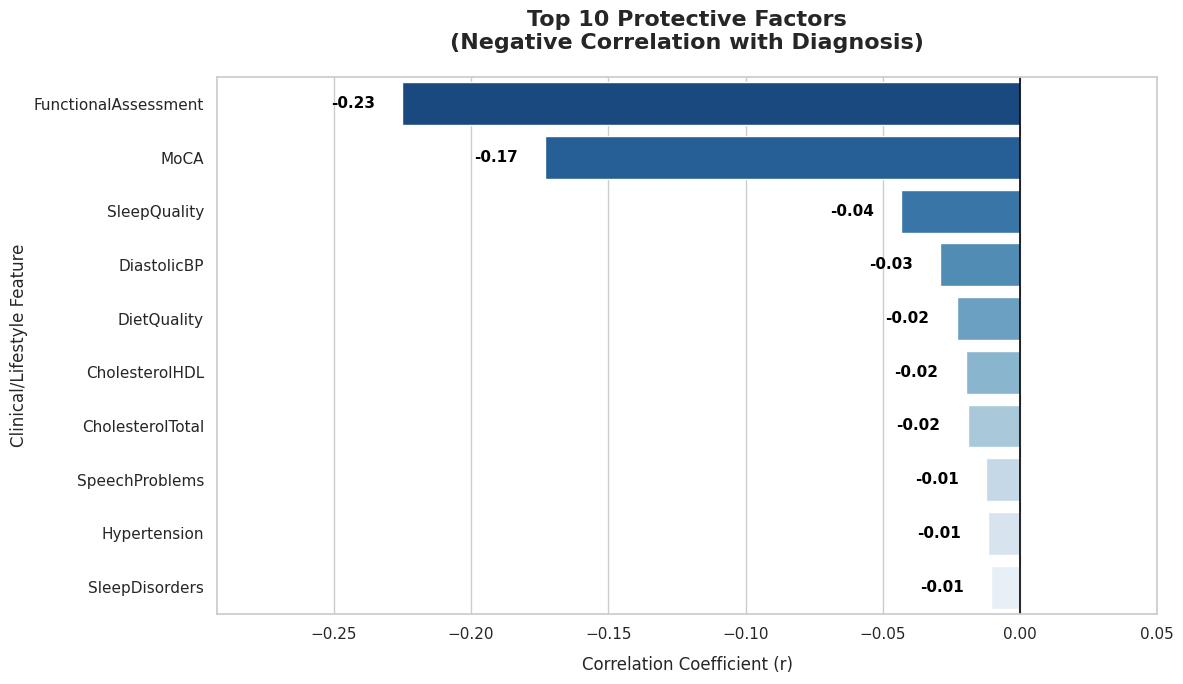

In [3]:
# 1. Extract features that have a negative correlation with Diagnosis
# Negative correlation means: as this feature increases, the likelihood of Parkinson's decreases
protective_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] < 0]

# 2. Sort to find the strongest protective effects (most negative values)
top_protective_factors = protective_factors.sort_values(ascending=True).head(10)

# 3. Visualization: Professional Bar Plot with a calm blue theme
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Using 'Blues_r' (Reversed Blues) to highlight the strongest factors in darker blue
protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')

# 4. Formatting: Set X-axis limits to create space for data labels
x_min = top_protective_factors.min() * 1.3
plt.xlim(x_min, 0.05) 

# 5. Professional Titles and Labeling
plt.title('Top 10 Protective Factors\n(Negative Correlation with Diagnosis)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12, labelpad=10)
plt.ylabel('Clinical/Lifestyle Feature', fontsize=12)

# 6. Add a vertical reference line at 0 for visual clarity
plt.axvline(0, color='black', linewidth=1.2)

# 7. Annotate: Display the exact correlation values next to the bars
for i, val in enumerate(top_protective_factors.values):
    protect_plot.text(val - 0.01, i, f'{val:.2f}', va='center', ha='right', 
                     fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

Part 4: Multi-Metric Comparison - The "Face" of the Disease

Objective: To determine if the same clinical features impact physical decline, cognitive impairment, and daily functional independence in the same way.

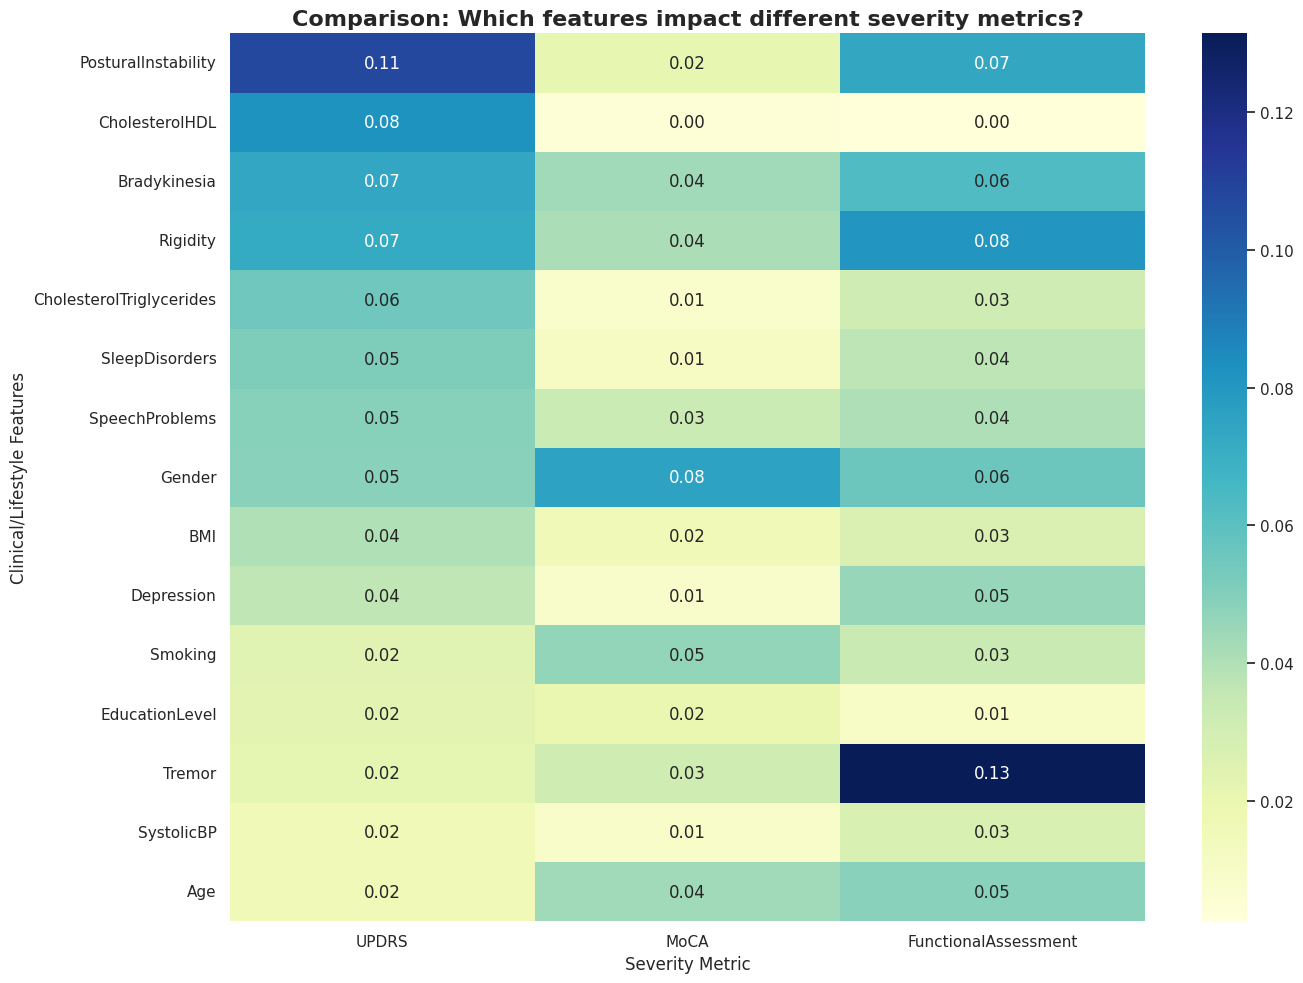

In [4]:
# --- Comparison of Different Severity Metrics ---

# 1. Filter only diagnosed patients
sick_df = df[df['Diagnosis'] == 1].copy()

# 2. Define our potential severity targets
severity_metrics = ['UPDRS', 'MoCA', 'FunctionalAssessment']

# 3. Features to check (excluding IDs and labels)
# We want to see how lifestyle/medical features affect each severity metric
exclude_cols = ['PatientID', 'Diagnosis', 'DoctorInCharge'] + severity_metrics
features = [col for col in sick_df.columns if col not in exclude_cols]

# 4. Calculate correlations for each metric
comparison_data = {}
for metric in severity_metrics:
    # We take the absolute correlation to see "strength" of impact
    corrs = sick_df[features + [metric]].corr()[metric].drop(metric).abs()
    comparison_data[metric] = corrs

# Create a summary DataFrame
comparison_df = pd.DataFrame(comparison_data)

# 5. Visualization: Side-by-Side Comparison
plt.figure(figsize=(14, 10))
sns.heatmap(comparison_df.sort_values(by='UPDRS', ascending=False).head(15), 
            annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Comparison: Which features impact different severity metrics?', fontsize=16, fontweight='bold')
plt.ylabel('Clinical/Lifestyle Features')
plt.xlabel('Severity Metric')
plt.tight_layout()
plt.show()

Part 5: Multi-Dimensional Profiles - Aggravating vs. Alleviating Factors

Objective: To identify the top 2 factors that either worsen (Aggravating) or improve (Alleviating) the three dimensions of the disease: Physical, Cognitive, and Functional

<Figure size 1500x800 with 0 Axes>

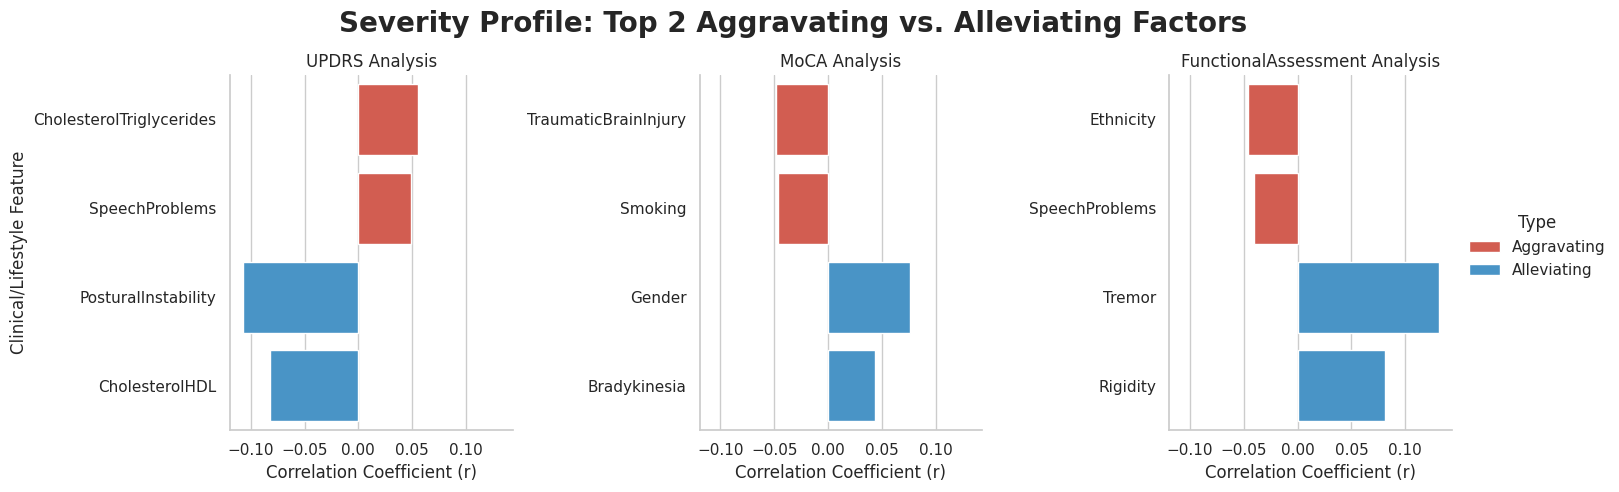

--- Detailed Severity Impact Summary ---


Metric,FunctionalAssessment,MoCA,UPDRS
Factor,,,
Bradykinesia,-,0.043327,-
CholesterolHDL,-,-,-0.082546
CholesterolTriglycerides,-,-,0.055042
Ethnicity,-0.046238,-,-
Gender,-,0.075781,-
PosturalInstability,-,-,-0.107494
Rigidity,0.08076,-,-
Smoking,-,-0.046669,-
SpeechProblems,-0.040564,-,0.049004


In [5]:
# 3. Define Severity Metrics
# UPDRS: High is BAD | MoCA: High is GOOD | Functional: High is GOOD
metrics = ['UPDRS', 'MoCA', 'FunctionalAssessment']

# 4. Feature Selection
# Exclude non-clinical columns and the metrics themselves
exclude = ['Diagnosis', 'DoctorInCharge'] + metrics
features = [col for col in sick_df.columns if col not in exclude]

# --- START MULTI-DIMENSIONAL ANALYSIS ---

summary_data = []

for metric in metrics:
    # Calculate correlations for this specific metric
    correlations = sick_df[features + [metric]].corr()[metric].drop(metric)
    
    # Logic: Identify Aggravating vs Alleviating based on metric type
    if metric == 'UPDRS':
        # Higher score = Worse condition
        aggravating = correlations.sort_values(ascending=False).head(2)
        alleviating = correlations.sort_values(ascending=True).head(2)
    else:
        # Higher score = Better condition (MoCA / Functional)
        # Therefore, negative correlation is aggravating
        aggravating = correlations.sort_values(ascending=True).head(2)
        alleviating = correlations.sort_values(ascending=False).head(2)
    
    # Collect results for visualization
    for factor, val in aggravating.items():
        summary_data.append({'Metric': metric, 'Factor': factor, 'Correlation': val, 'Type': 'Aggravating'})
    for factor, val in alleviating.items():
        summary_data.append({'Metric': metric, 'Factor': factor, 'Correlation': val, 'Type': 'Alleviating'})

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(summary_data)

# 5. Professional Visualization: Severity Profiles
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot showing how factors impact different metrics
g = sns.catplot(
    data=results_df, kind="bar",
    x="Correlation", y="Factor", hue="Type", col="Metric",
    palette={"Aggravating": "#e74c3c", "Alleviating": "#3498db"},
    sharey=False, height=5, aspect=1
)

# Formatting the Presentation
g.set_axis_labels("Correlation Coefficient (r)", "Clinical/Lifestyle Feature")
g.set_titles("{col_name} Analysis")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Severity Profile: Top 2 Aggravating vs. Alleviating Factors', fontsize=20, fontweight='bold')

plt.show()

# 6. Final Summary Table for the Presentation
print("--- Detailed Severity Impact Summary ---")
pivot_table = results_df.pivot(index='Factor', columns='Metric', values='Correlation')
display(pivot_table.fillna('-'))

Part 6: Internal Symptom Correlation - The "Dissociation" Check

Objective: To examine the internal relationship between physical decline (UPDRS), cognitive health (MoCA), and functional independence

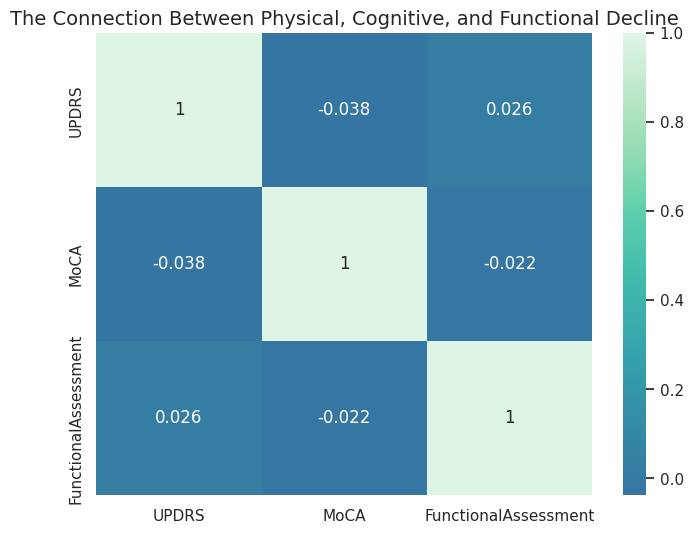

In [6]:
# --- Correlation Between Different Severity Dimensions ---
severity_cols = ['UPDRS', 'MoCA', 'FunctionalAssessment']
internal_corr = sick_df[severity_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(internal_corr, annot=True, cmap='mako', center=0)
plt.title('The Connection Between Physical, Cognitive, and Functional Decline', fontsize=14)
plt.show()

Part 7: The Bridge – Statistical Randomness vs. Clinical Reality (Poisson Analysis)

Objective: To determine if the accumulation of Parkinson's symptoms occurs randomly or follows a structured clinical pattern, justifying our search for specific "Symptom Clusters."

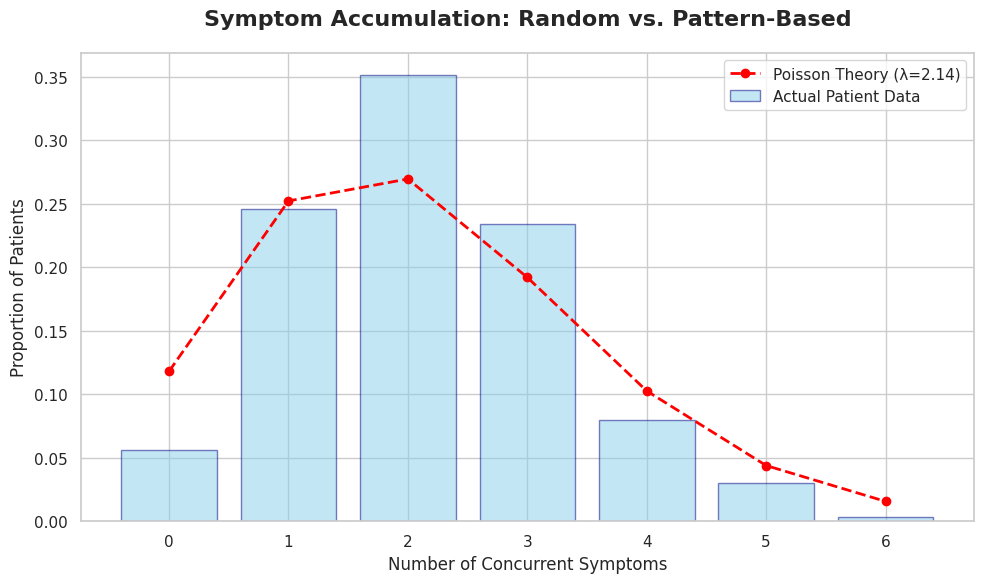

Average symptoms per patient (Lambda): 2.14


In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

# 1. Prepare the data: Count how many symptoms each diagnosed patient has
# Using the symptoms list we defined earlier
symptoms = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 
            'SpeechProblems', 'SleepDisorders', 'Constipation']

# We calculate the sum of symptoms for each patient in the sick_df
sick_df['SymptomCount'] = sick_df[symptoms].sum(axis=1)

# 2. Calculate the Actual Distribution (Probability of having k symptoms)
actual_dist = sick_df['SymptomCount'].value_counts(normalize=True).sort_index()

# 3. Calculate the Theoretical Poisson Distribution
# Lambda (mu) is the average number of symptoms per patient
mu = sick_df['SymptomCount'].mean()
theoretical_poisson = [poisson.pmf(k, mu) for k in range(len(actual_dist))]

# 4. Visualization: Comparison Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plotting actual patient data
plt.bar(actual_dist.index, actual_dist.values, alpha=0.5, 
        label='Actual Patient Data', color='skyblue', edgecolor='navy')

# Plotting the theoretical Poisson curve
# Formula: P(k) = (lambda^k * e^-lambda) / k!
plt.plot(actual_dist.index, theoretical_poisson, marker='o', 
         linestyle='--', color='red', linewidth=2, label=f'Poisson Theory (λ={mu:.2f})')

# 5. Professional Labeling
plt.title('Symptom Accumulation: Random vs. Pattern-Based', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Concurrent Symptoms', fontsize=12)
plt.ylabel('Proportion of Patients', fontsize=12)
plt.xticks(actual_dist.index)
plt.legend()

plt.tight_layout()
plt.show()

# 6. Insight for the Presentation
print(f"Average symptoms per patient (Lambda): {mu:.2f}")

Part 8: The Tremor Paradox – Finding the Disease "Gatekeeper"

Objective: To move beyond general correlations and identify which specific symptom dictates the overall "burden" of the disease. We test which symptoms "invite" others versus those that appear in isolation.

/tmp/ipykernel_446068/3337595582.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  gate_plot = sns.barplot(data=impact_df, x='Impact', y='Symptom', palette=colors)


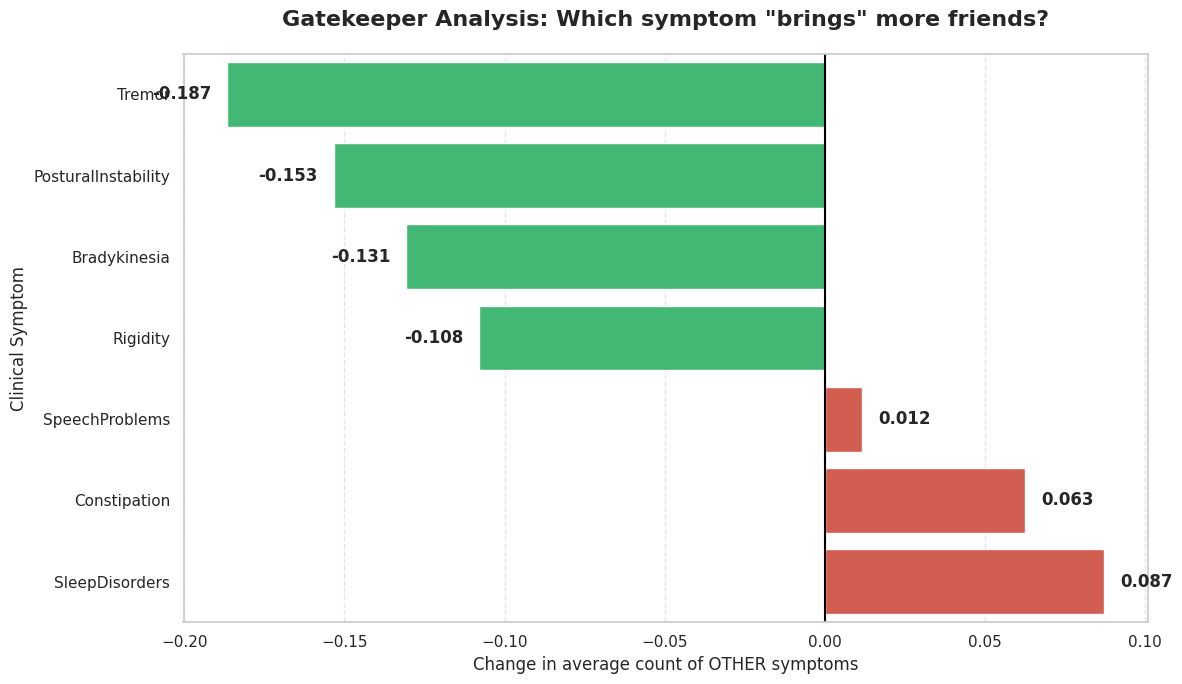

In [16]:
# --- Gatekeeper Analysis: Comparing All Symptoms ---

# 1. Define the full list of symptoms
symptoms = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']
results = []

# 2. Logic: Loop through each symptom to see its impact on others
for s in symptoms:
    # Get a list of all symptoms EXCEPT the current one
    others = [sym for sym in symptoms if sym != s]
    
    # Split the sick population into two groups
    group_with = sick_df[sick_df[s] == 1]
    group_without = sick_df[sick_df[s] == 0]
    
    # Calculate the average count of OTHER symptoms for each group
    avg_with = group_with[others].sum(axis=1).mean()
    avg_without = group_without[others].sum(axis=1).mean()
    
    # Calculate the "Impact" (Difference)
    impact = avg_with - avg_without
    results.append({'Symptom': s, 'Impact': impact})

# 3. Create a DataFrame and sort by the most significant impact
impact_df = pd.DataFrame(results).sort_values(by='Impact')

# 4. Visualization: Professional Bar Plot
plt.figure(figsize=(12, 7))

# Coloring: Green for negative impact (buffering), Red for positive (aggravating)
colors = ['#2ecc71' if x < 0 else '#e74c3c' for x in impact_df['Impact']]

# Create the bar plot
gate_plot = sns.barplot(data=impact_df, x='Impact', y='Symptom', palette=colors)

# Add a vertical line at 0 for reference
plt.axvline(0, color='black', linewidth=1.5)

# Formatting for the presentation
plt.title('Gatekeeper Analysis: Which symptom "brings" more friends?', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Change in average count of OTHER symptoms', fontsize=12)
plt.ylabel('Clinical Symptom', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adding the exact values on the bars
for i, val in enumerate(impact_df['Impact']):
    plt.text(val + (0.005 if val > 0 else -0.005), i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

Part 9: Phenotype Profiling – Visualizing the "Tremor Advantage"

Objective: To empirically prove the "Tremor Paradox" by comparing the actual prevalence of secondary symptoms between patients who exhibit tremors and those who do not. This distinguishes between the "Tremor Dominant" and "Non-Tremor Dominant" phenotypes.

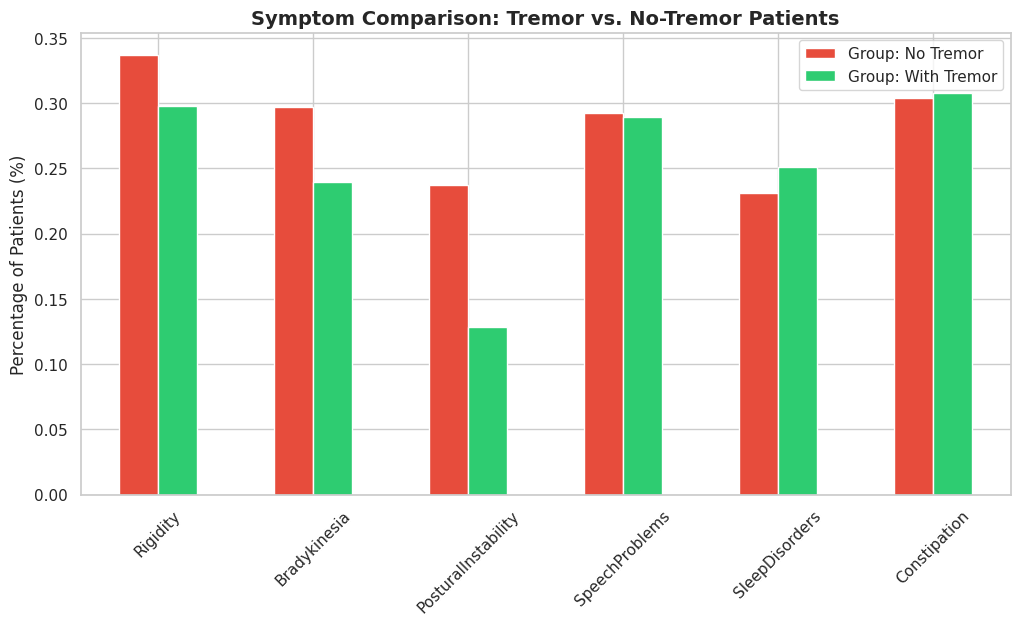

In [17]:
# 1. Split the data into two distinct groups
with_tremor = sick_df[sick_df['Tremor'] == 1]
no_tremor = sick_df[sick_df['Tremor'] == 0]

# 2. List of symptoms we want to compare (excluding Tremor itself)
other_symptoms = ['Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']

# 3. Calculate the prevalence (%) of each symptom for both groups
comparison = sick_df.groupby('Tremor')[other_symptoms].mean().T
comparison.columns = ['Group: No Tremor', 'Group: With Tremor']

# 4. Plotting the comparison
comparison.plot(kind='bar', color=['#e74c3c', '#2ecc71'], figsize=(12, 6))
plt.title('Symptom Comparison: Tremor vs. No-Tremor Patients', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Patients (%)')
plt.xticks(rotation=45)
plt.show()

Part 10: Functional Independence – Can Exercise Keep Patients Independent?

Objective: To verify if the "Buffering Effect" extends to the patient's ability to perform daily activities and maintain independence

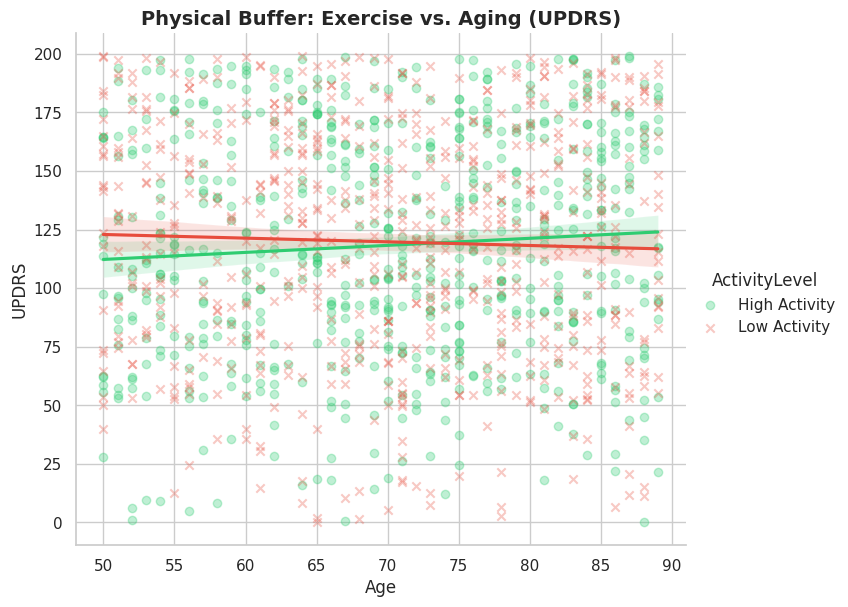

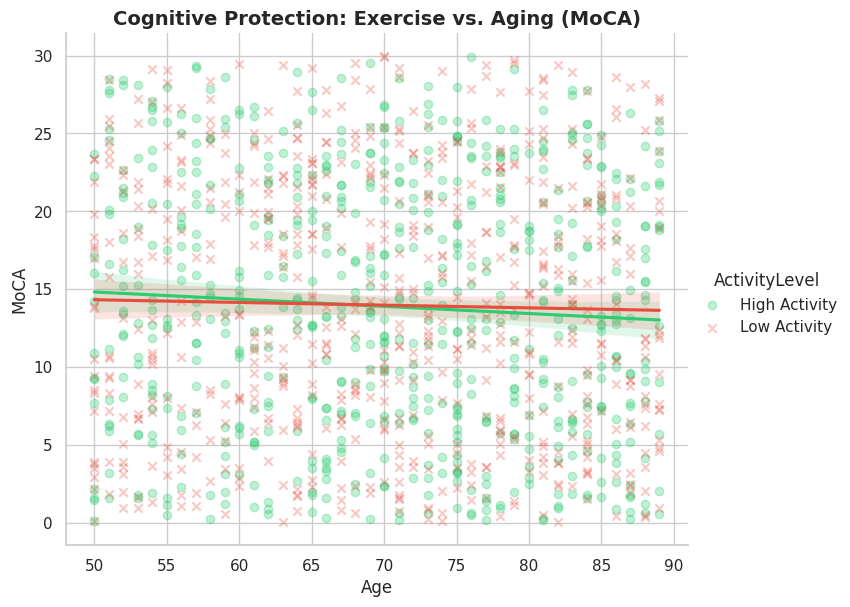

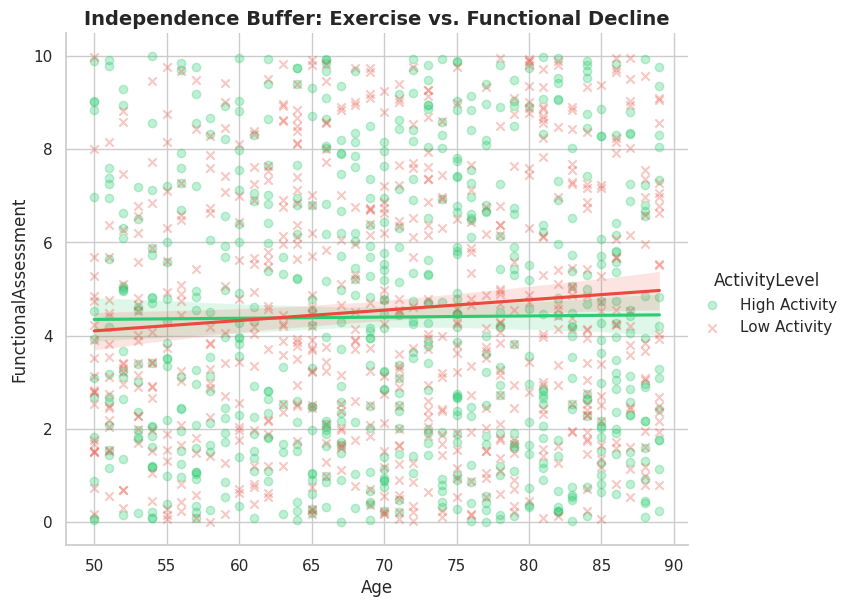

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create the ActivityLevel groups (Must be done first)
# We use the median of PhysicalActivity to split the sick population fairly
median_act = sick_df['PhysicalActivity'].median()

# Define groups: High Activity vs Low Activity
sick_df.loc[sick_df['PhysicalActivity'] > median_act, 'ActivityLevel'] = 'High Activity'
sick_df.loc[sick_df['PhysicalActivity'] <= median_act, 'ActivityLevel'] = 'Low Activity'

# 2. Visualization A: Physical Severity (UPDRS)
# Does exercise "flatten the curve" of physical aging?
g1 = sns.lmplot(
    data=sick_df, 
    x='Age', y='UPDRS', hue='ActivityLevel', 
    palette={'High Activity': '#2ecc71', 'Low Activity': '#e74c3c'}, # Green vs Red
    markers=["o", "x"], height=6, aspect=1.2, scatter_kws={'alpha': 0.3}
)
plt.title('Physical Buffer: Exercise vs. Aging (UPDRS)', fontsize=14, fontweight='bold')
plt.show()

# 3. Visualization B: Cognitive Health (MoCA)
# Does exercise protect the brain's cognitive reserve?
g2 = sns.lmplot(
    data=sick_df, 
    x='Age', y='MoCA', hue='ActivityLevel', 
    palette={'High Activity': '#2ecc71', 'Low Activity': '#e74c3c'},
    markers=["o", "x"], height=6, aspect=1.2, scatter_kws={'alpha': 0.3}
)
plt.title('Cognitive Protection: Exercise vs. Aging (MoCA)', fontsize=14, fontweight='bold')
plt.show()
# 4. Visualization C: Functional Assessment
# Does exercise help maintain independence and quality of daily life?
# Reminder: For Functional Assessment, Higher is BETTER.
g3 = sns.lmplot(
    data=sick_df, 
    x='Age', y='FunctionalAssessment', hue='ActivityLevel', 
    palette={'High Activity': '#2ecc71', 'Low Activity': '#e74c3c'},
    markers=["o", "x"], height=6, aspect=1.2, scatter_kws={'alpha': 0.3}
)

plt.title('Independence Buffer: Exercise vs. Functional Decline', fontsize=14, fontweight='bold')
plt.show()

Part 11: The Disease Roadmap – Mapping the Lifespan of Parkinson's

Objective: To synthesize our findings into a single, continuous timeline. By applying Time-Series techniques (Rolling Averages), we can visualize the exact trajectory of physical and cognitive decline, identifying critical "windows of acceleration

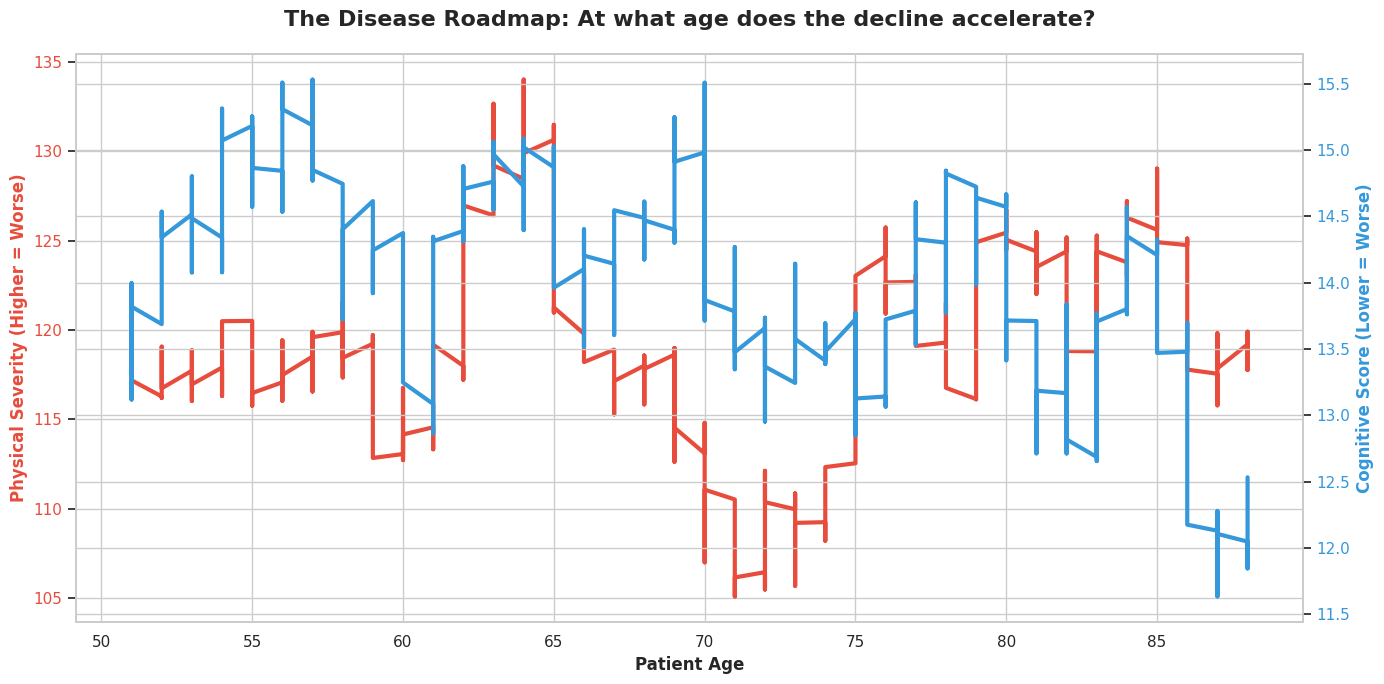

In [19]:
# --- 3. The Progression Path: Rolling Average by Age ---

# 1. Sort patients by age to create a "synthetic timeline"
progression_df = sick_df.sort_values('Age')

# 2. Calculate Rolling Mean (Moving Average) to smooth the data
# We use a window of 100 patients to see the underlying trend
window_size = 100
progression_df['UPDRS_Smooth'] = progression_df['UPDRS'].rolling(window=window_size, center=True).mean()
progression_df['MoCA_Smooth'] = progression_df['MoCA'].rolling(window=window_size, center=True).mean()

# 3. Visualization: Dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Physical Severity (Red line)
ax1.plot(progression_df['Age'], progression_df['UPDRS_Smooth'], color='#e74c3c', linewidth=3, label='Physical (UPDRS)')
ax1.set_xlabel('Patient Age', fontsize=12, fontweight='bold')
ax1.set_ylabel('Physical Severity (Higher = Worse)', color='#e74c3c', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#e74c3c')

# Cognitive Score (Blue line) on a second Y-axis
ax2 = ax1.twinx()
ax2.plot(progression_df['Age'], progression_df['MoCA_Smooth'], color='#3498db', linewidth=3, label='Cognitive (MoCA)')
ax2.set_ylabel('Cognitive Score (Lower = Worse)', color='#3498db', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#3498db')

plt.title('The Disease Roadmap: At what age does the decline accelerate?', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()